In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  

%matplotlib inline

In [7]:
data = loadmat('ex3data1.mat')
weights = loadmat('ex3weights.mat')

X = data['X']

# Add bias unit
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

y = data['y']

theta1 = weights['Theta1']
theta2 = weights['Theta2']

In [41]:
import scipy
import matplotlib.cm as cm 

# Logistic func
sigmoid = lambda z: 1 / (1 + np.exp(-z))

def forward_propagation(row, thetas):
    features = row
    for i in range(len(thetas)):
        theta = thetas[i]
        z = np.dot(theta, features)
        a = sigmoid(z)
        
        if i == len(thetas) - 1:
            return a
        
        # Add bias unit after layer activation calculation
        a = np.insert(a, 0, 1)
        features = a

        
def predict(row, thetas):
        res = forward_propagation(row, thetas)
        classes = list(range(1, 11))
        return classes[np.argmax(res)]

    
def image_matrix(row):
    width, height = 20, 20
    square = row[1:].reshape(width,height)
    return square.T


def image(row, thetas):
    fig = plt.figure(figsize=(3,3))
    img = scipy.misc.toimage(image_matrix(row))
    plt.imshow(img,cmap = cm.Greys_r)
    predicted = predict(row, thetas)
    fig.suptitle('Predicted: %d' % predicted, fontsize=14, fontweight='bold')

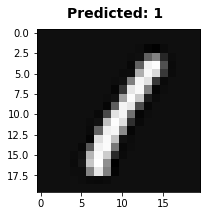

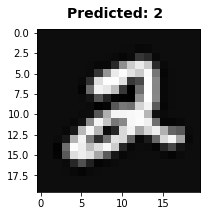

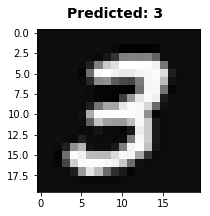

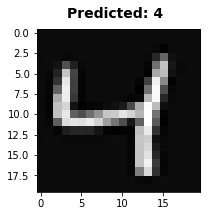

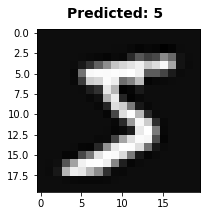

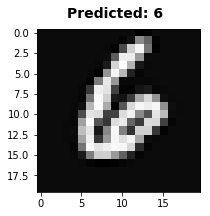

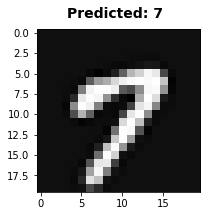

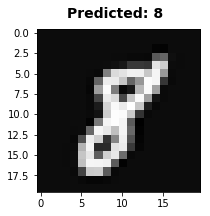

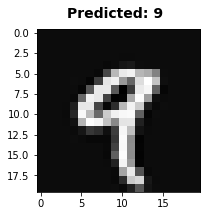

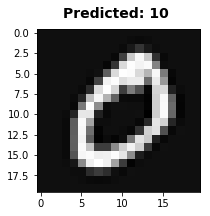

In [42]:
thetas = [theta1, theta2]
y_list = y.ravel().tolist()

for i in range(1, 11):
    index = y_list.index(i)
    image(X[index], thetas)